In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [85]:
#reading files
Female_births = pd.read_csv('daily-total-female-births-in-cal.csv')
Passengers = pd.read_csv('international-airline-passengers.csv')
Air_temp = pd.read_csv('mean-monthly-air-temperature-deg.csv')
Boston_robberies = pd.read_csv('monthly-boston-armed-robberies-j.csv')
Sales = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
Closings = pd.read_csv('weekly-closings-of-the-dowjones-.csv')

In [15]:
#initiate dict
all_series = {
    "daily-total-female-births-in-cal": Female_births["Count"],
    "international-airline-passengers": Passengers["Count"],
    "mean-monthly-air-temperature-deg": Air_temp["Deg"],
    "monthly-boston-armed-robberies-j": Boston_robberies["Count"],
    "monthly-sales-of-company-x-jan-6": Sales["Count"],
    "Daily total female births in California": California_births["Close"]
}

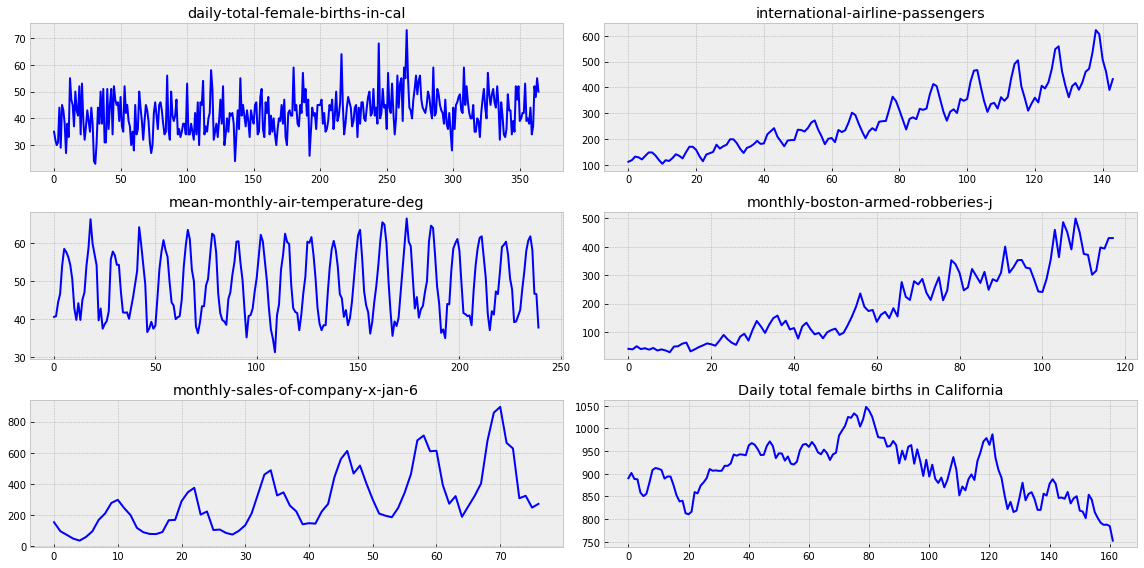

In [16]:
#drawing all plots
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [17]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [38]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## daily-total-female-births-in-cal

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


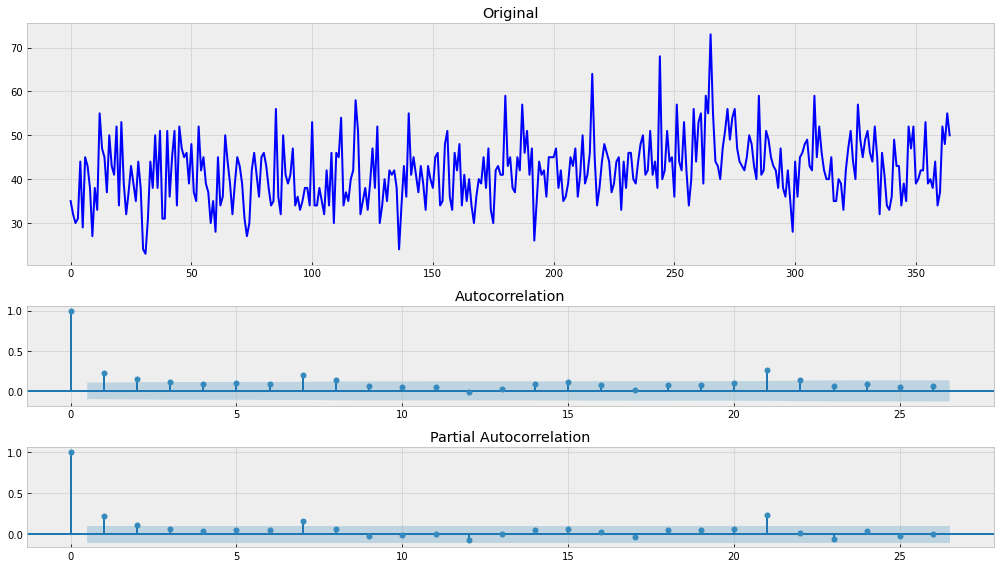

In [44]:
tsplot(Female_births['Count'])

Time series is stationary in accordance with Dickey-Fuller test and autocorrelation graph

## international-airline-passengers

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


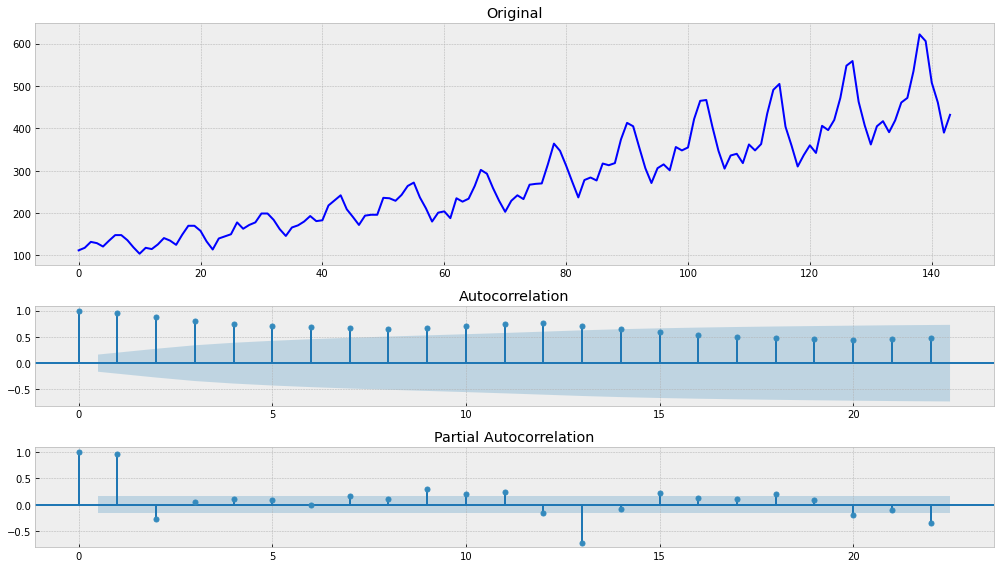

In [45]:
tsplot(Passengers['Count'])

Time series is not stationary

In [46]:
#Applying Boxcox adjustment
Series_Passengers = Passengers['Count']
Series_Passengers = boxcox(Series_Passengers, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


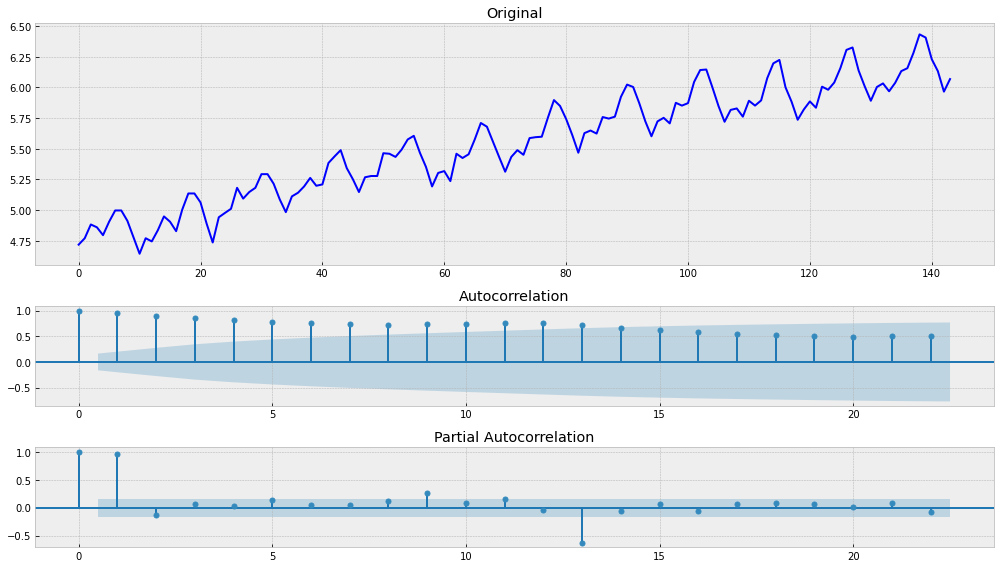

In [47]:
tsplot(Series_Passengers)

In [48]:
#remove seasonality
Series_Passengers = Series_Passengers[12:] - Series_Passengers[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


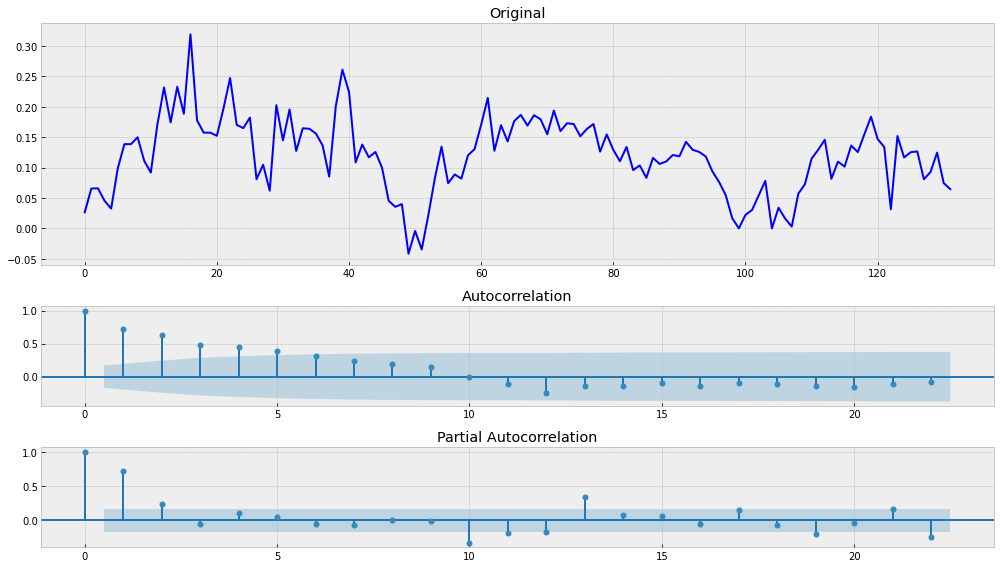

In [49]:
tsplot(Series_Passengers)

In [50]:
#Differentiate 
Series_Passengers = Series_Passengers[1:] - Series_Passengers[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


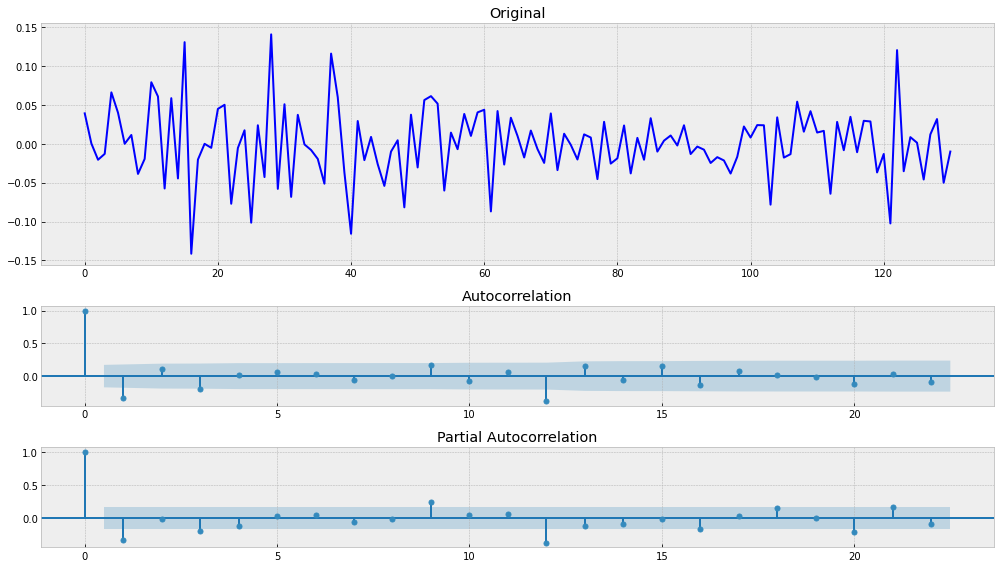

In [51]:
tsplot(Series_Passengers)

## mean-monthly-air-temperature-deg

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


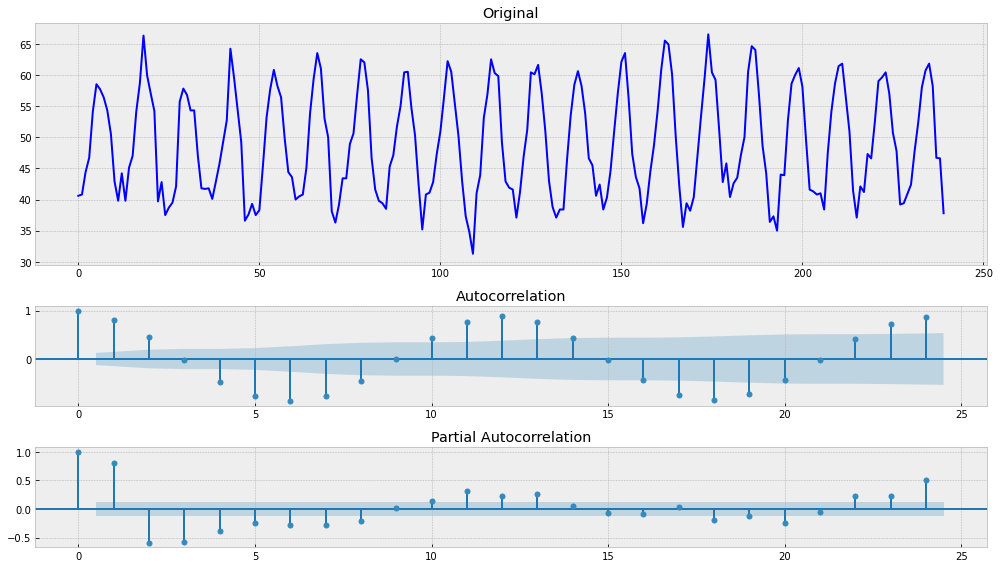

In [52]:
tsplot(Air_temp['Deg'])

In [58]:
Series_Air_temp = Air_temp['Deg']
Series_Air_temp = boxcox(Series_Air_temp, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


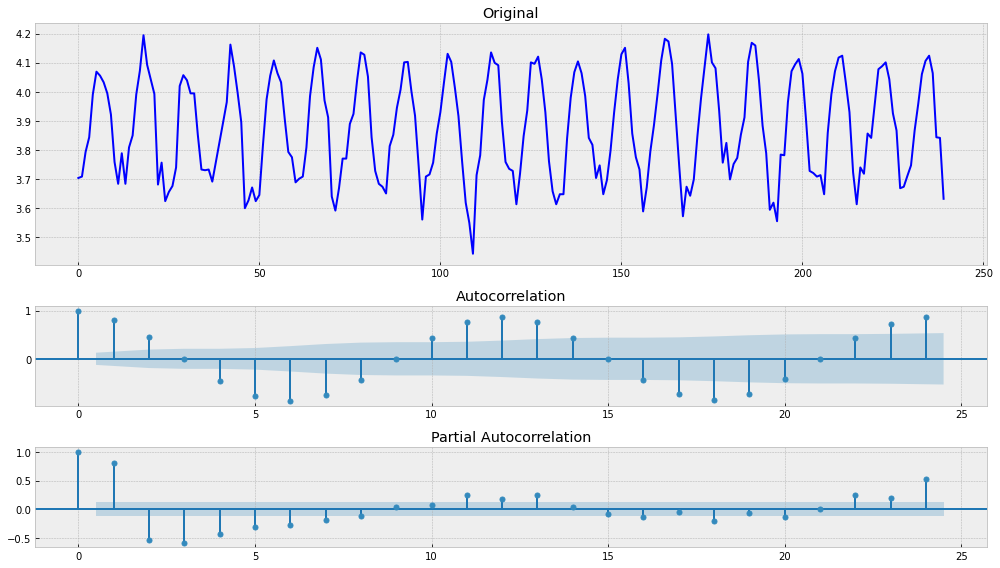

In [59]:
tsplot(Series_Air_temp)

In [62]:
#remove seasonality
Series_Air_temp = Series_Air_temp[12:] - Series_Air_temp[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


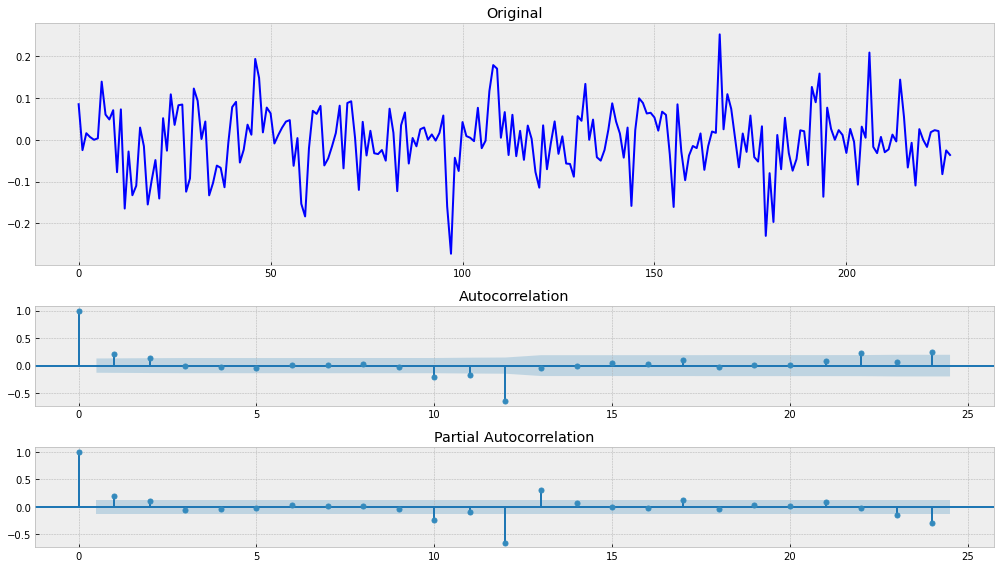

In [63]:
tsplot(Series_Air_temp)

### monthly-boston-armed-robberies-j

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


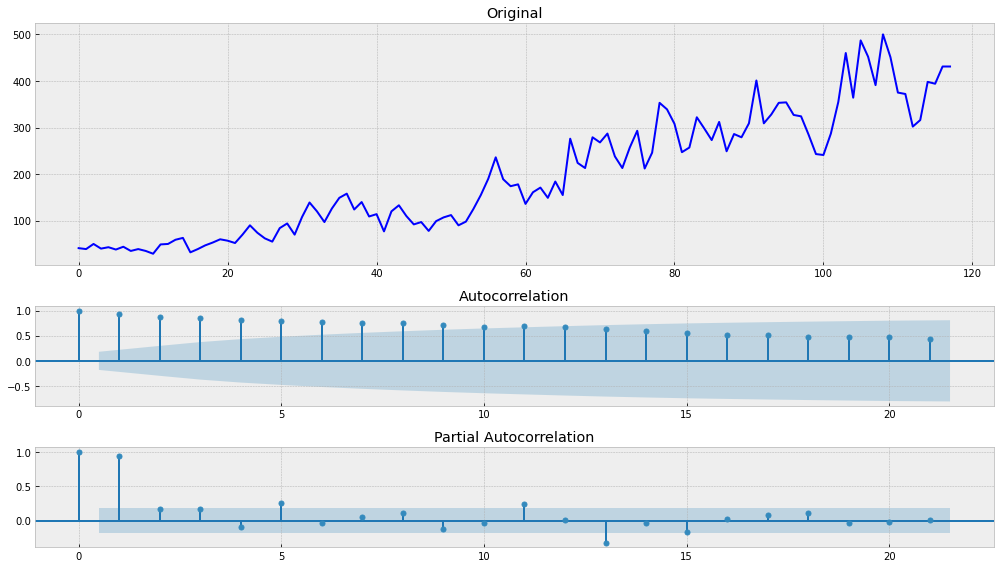

In [64]:
tsplot(Boston_robberies['Count'])

In [65]:
#Applying Boxcox adjustment
Series_Boston_rob = Boston_robberies['Count']
Series_Boston_rob = boxcox(Series_Boston_rob, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


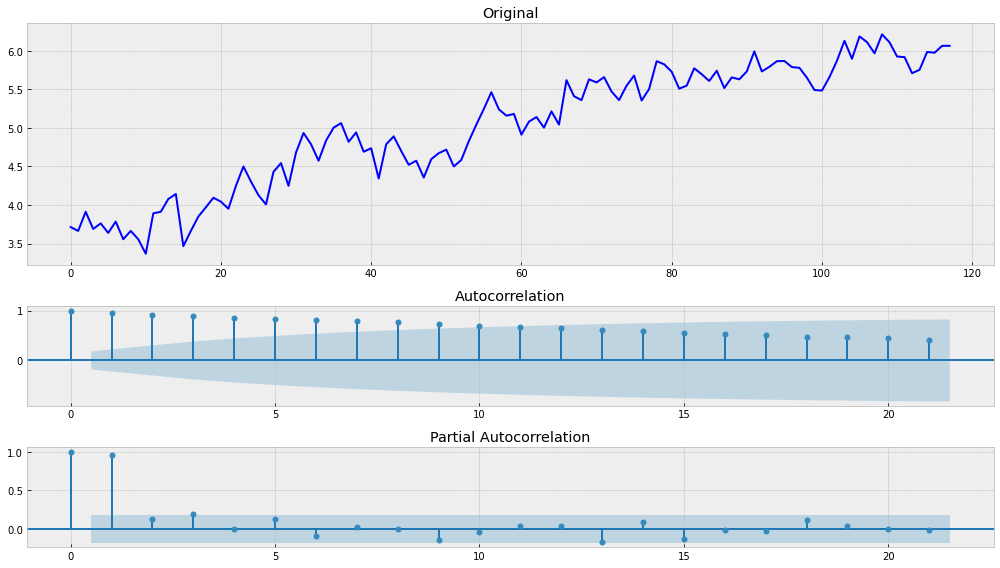

In [72]:
tsplot(Series_Boston_rob)

In [73]:
#Differentiate 
Series_Boston_rob = Series_Boston_rob[1:] - Series_Boston_rob[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


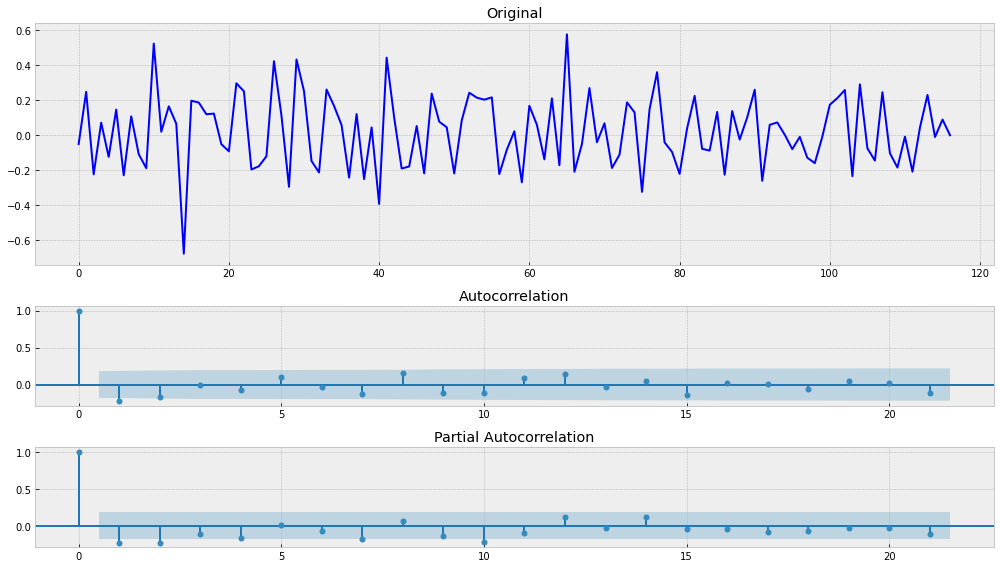

In [74]:
tsplot(Series_Boston_rob)

### monthly-sales-of-company-x-jan-6

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\spass\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


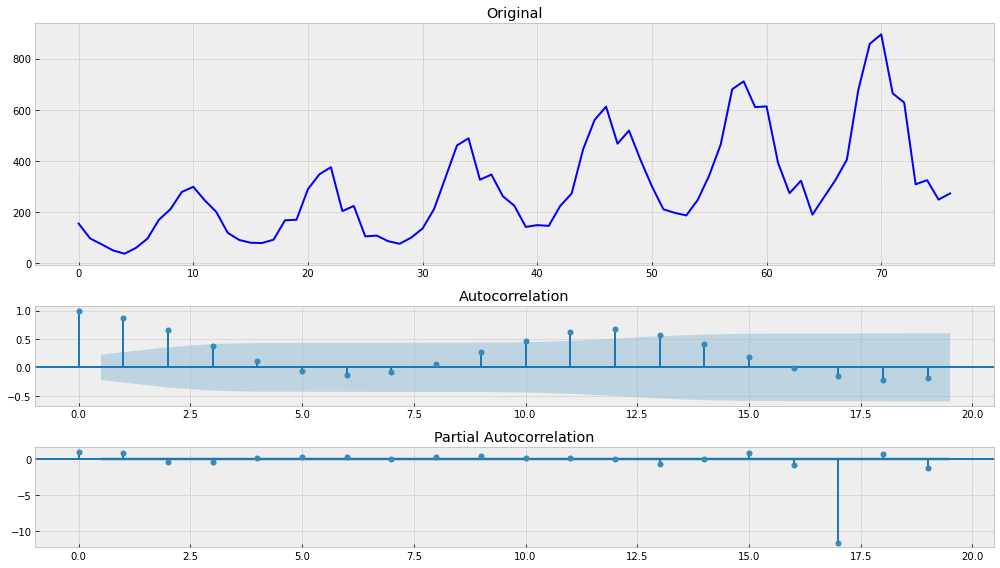

In [76]:
tsplot(Sales['Count'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\spass\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


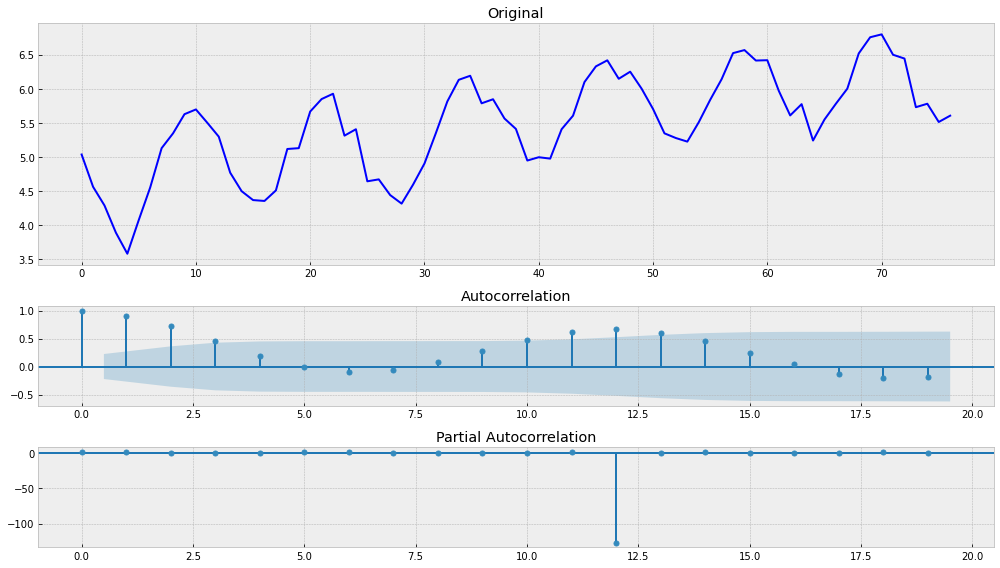

In [77]:
#Applying Boxcox adjustment
Series_Sales = Sales['Count']
Series_Sales = boxcox(Series_Sales, 0)
tsplot(Series_Sales)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


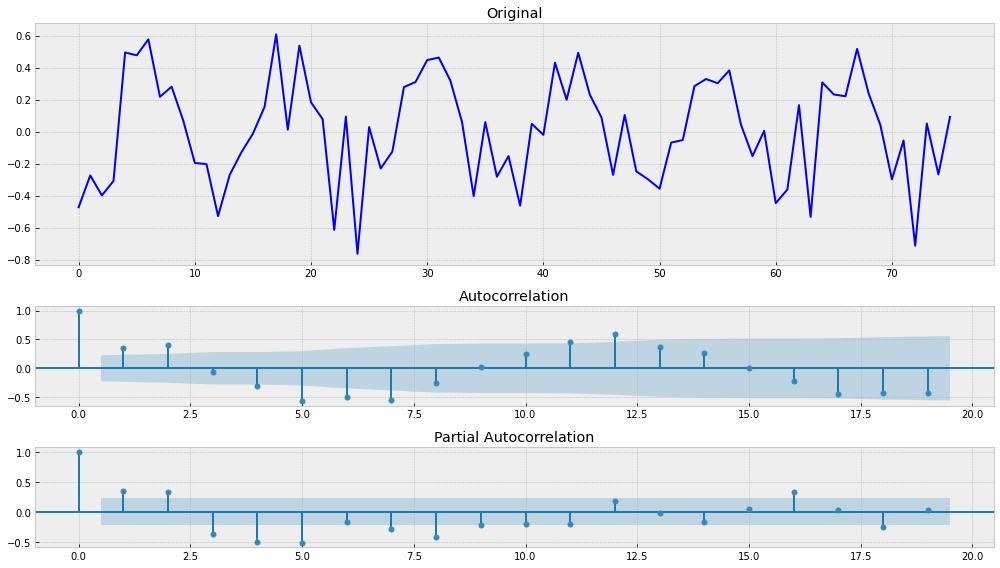

In [78]:
#Differentiate 
Series_Sales = Series_Sales[1:] - Series_Sales[:-1]
tsplot(Series_Sales)

In [83]:
#remove seasonality
Series_Sales = Series_Sales[9:] - Series_Sales[:-9]

Results of Dickey-Fuller Test:
Test Statistic                 -2.405751
p-value                         0.140120
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


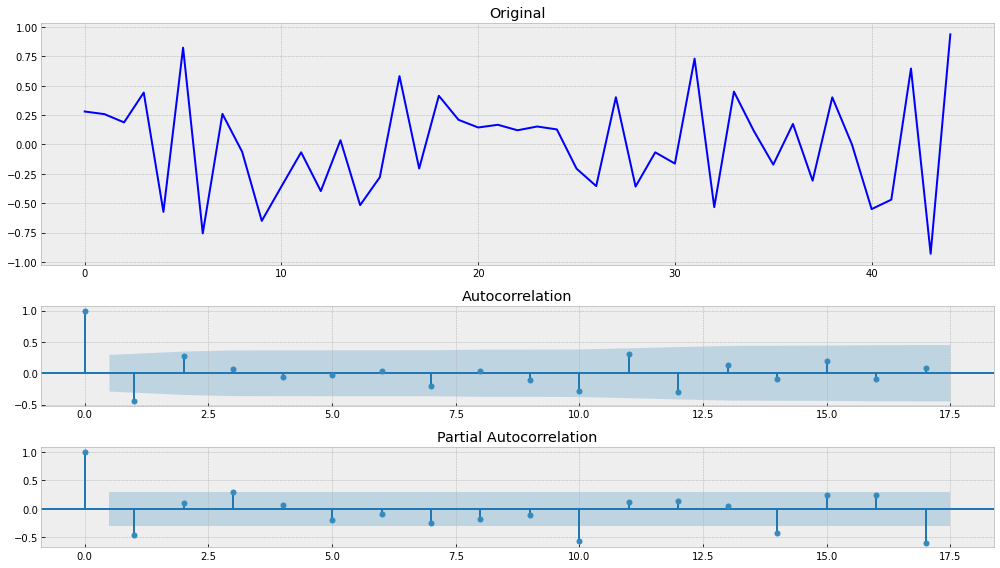

In [84]:
tsplot(Series_Sales)

### weekly-closings-of-the-dowjones-

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


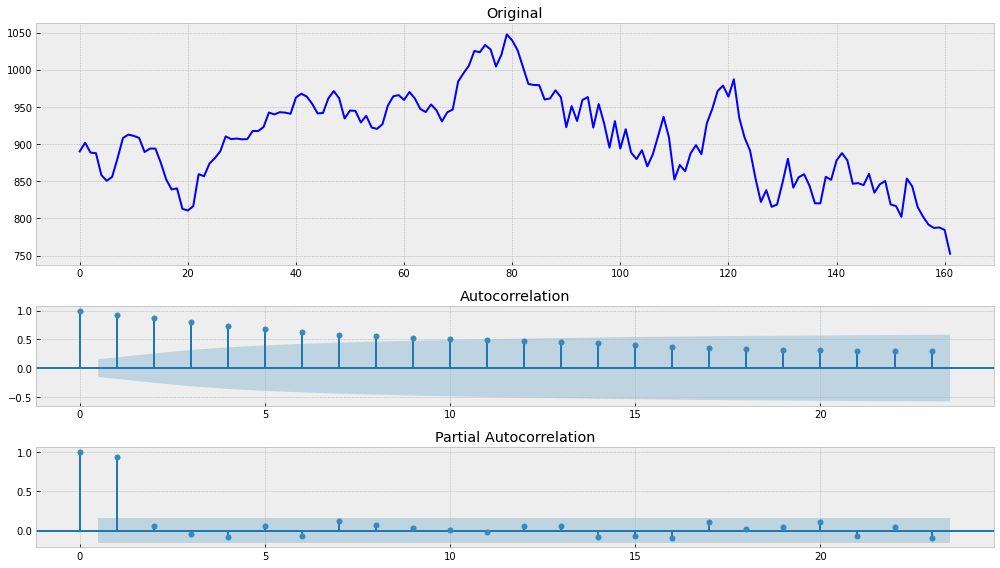

In [86]:
tsplot(Closings['Close'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.405751
p-value                         0.140120
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


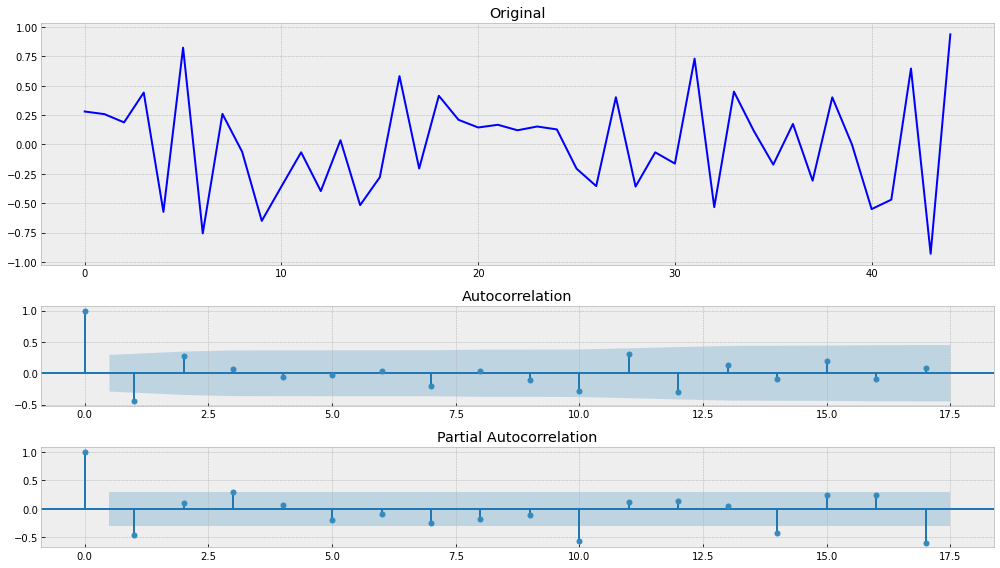

In [87]:
#Applying Boxcox adjustment
Series_Closings = Closings['Close']
Series_Closings = boxcox(Series_Closings, 0)
tsplot(Series_Sales)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


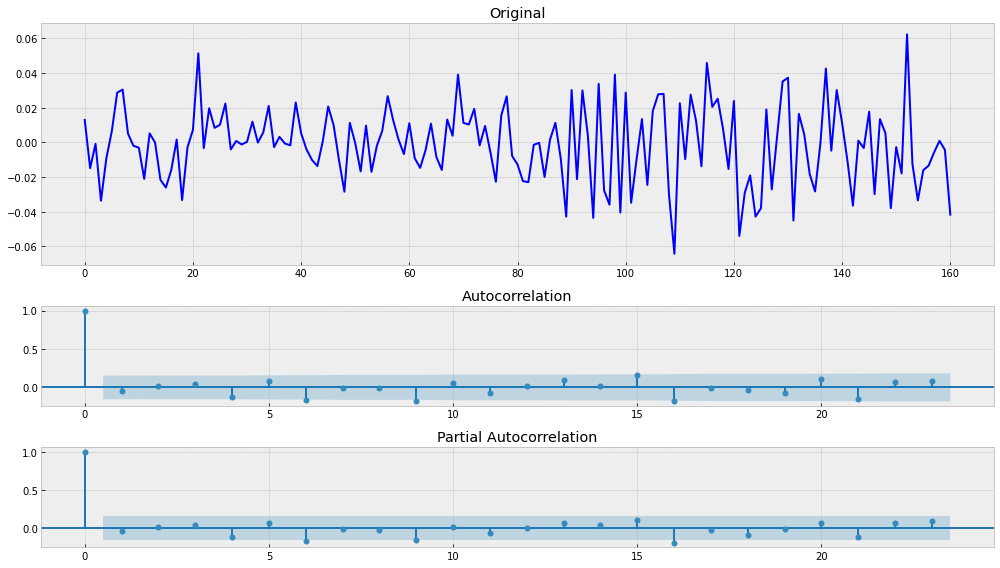

In [88]:
#Differentiate 
Series_Closings = Series_Closings[1:] - Series_Closings[:-1]
tsplot(Series_Closings)